In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from scipy import stats
import matplotlib.pylab as plt

# Hierarchical Clustering 

In [2]:
air = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
df_norm = norm_func(air.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


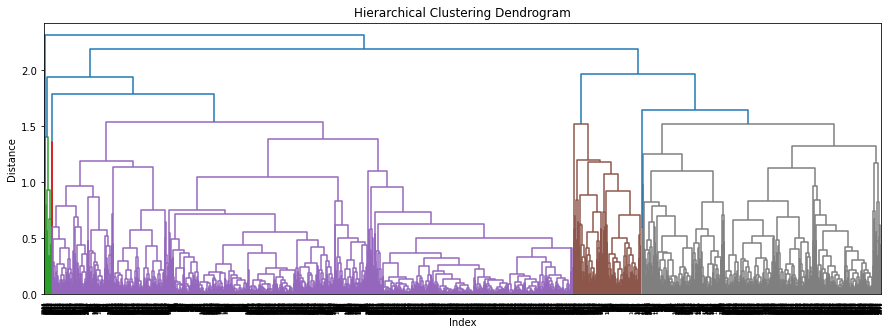

In [6]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    )
plt.show()

In [5]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=70, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
air['clust']=cluster_labels # creating a  new column and assigning it to new column 
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,25
1,2,19244,0,1,1,1,215,2,0,0,6968,0,25
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,25
3,4,14776,0,1,1,1,500,1,0,0,6952,0,25
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,24
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,32


In [6]:
air.iloc[:,1:].groupby(air.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,117798.416667,699.583333,1.083333,1.0,1.0,20508.750000,28.666667,8554.833333,25.083333,4797.916667,1.0,0.0
1,53240.532609,137.492754,1.010870,1.0,1.0,5618.068841,6.192029,484.326087,1.572464,2898.967391,1.0,1.0
2,167177.562500,0.000000,4.296875,1.0,1.0,45580.781250,19.953125,383.562500,0.968750,4591.750000,0.0,2.0
3,857614.500000,718.125000,4.750000,1.0,1.0,67559.375000,28.625000,1687.500000,6.375000,7236.000000,1.0,3.0
4,103893.280255,12.738854,2.764331,1.0,1.0,16248.031847,15.433121,166.624204,0.566879,6472.133758,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
65,138337.348837,137.558140,1.000000,1.0,1.0,9845.930233,16.906977,2156.232558,6.255814,5316.023256,1.0,65.0
66,13375.000000,4301.000000,4.000000,1.0,1.0,15732.000000,43.000000,9200.000000,28.000000,5916.000000,1.0,66.0
67,96396.666667,3778.333333,3.333333,1.0,1.0,28473.666667,17.333333,33.333333,0.333333,1118.666667,0.0,67.0


# K-Means Clustering

In [7]:
df_norm = norm_func(air.iloc[:,1:]) 
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.362319
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.362319
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.362319
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.362319
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.173913


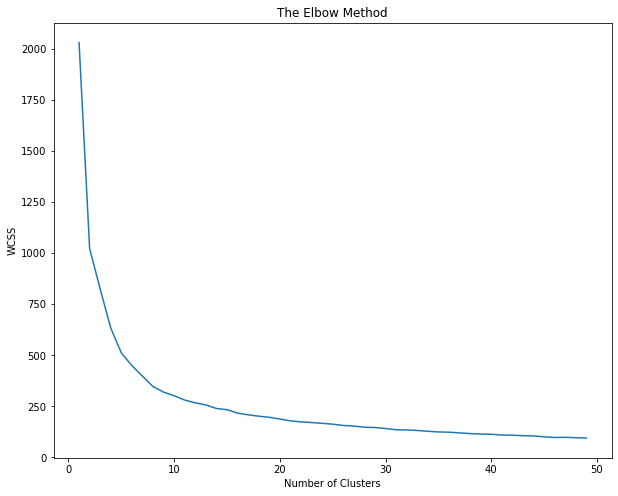

In [8]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 50):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) 
plt.plot(range(1, 50), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [9]:
WCSS

[2030.1230255678329,
 1022.3013899924895,
 823.6942647896599,
 633.2573313647322,
 511.2898528896899,
 449.3356540218559,
 397.6331543508887,
 346.8737298329072,
 319.49083439657636,
 302.02001082942184,
 280.6531792528955,
 267.0202853450952,
 256.9896050367955,
 239.45579164688394,
 233.644521428306,
 216.84116234811032,
 208.50201869876256,
 201.7916880092285,
 196.40584457088954,
 187.89660365950908,
 178.9994650727846,
 173.95068987880538,
 170.8052208190692,
 166.80606576295685,
 162.756303789537,
 156.39601960162526,
 153.42134160710384,
 148.11511186425415,
 146.10582132605546,
 141.45254683190214,
 135.3958765951756,
 134.5495541792114,
 131.92026156689928,
 127.98746660758457,
 124.80954833350181,
 123.46839404226233,
 120.07937906194346,
 116.67340233296511,
 114.3083262324917,
 113.29838900405379,
 109.61342911613144,
 108.8280953464998,
 106.24143156614993,
 105.30899578894575,
 100.66471113946493,
 97.61391655694888,
 98.37223785529109,
 96.58553012266104,
 94.88743939542

In [10]:
clf = KMeans(n_clusters=20)
y_kmeans = clf.fit_predict(df_norm)
y_kmeans

array([0, 0, 0, ..., 4, 2, 2])

In [11]:
md=pd.Series(y_kmeans)   
air['clust']=md  
air 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,9
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,9
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [12]:
air.iloc[:,1:13].groupby(air.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,51218.780488,87.222997,1.003484,1.000000,1.003484,2343.142857,5.909408,282.968641,0.783972,6916.306620,0.0,0
1,174067.324607,325.869110,4.539267,1.000000,1.015707,63467.382199,20.554974,599.010471,1.900524,6854.256545,1.0,1
2,24637.846154,105.529304,1.000000,1.007326,1.000000,2465.065934,5.115385,228.184982,0.639194,1307.549451,0.0,2
3,156405.366667,1226.516667,1.000000,1.000000,1.033333,14769.350000,17.750000,1989.550000,5.983333,4872.550000,1.0,3
4,47047.756477,79.056995,2.725389,1.000000,1.000000,18161.279793,15.316062,332.689119,0.906736,2892.569948,1.0,4
5,101331.180233,11.627907,2.697674,1.000000,1.000000,15630.279070,15.313953,158.395349,0.534884,6407.494186,0.0,5
6,46128.940120,105.794411,1.123752,1.000000,1.000000,3549.768463,6.918164,201.023952,0.624750,4734.562874,0.0,6
7,138712.475610,22.689024,4.213415,1.006098,1.006098,43429.506098,18.457317,234.853659,0.603659,3527.945122,0.0,7
8,78172.225455,105.829091,2.810909,1.000000,1.021818,18525.189091,15.992727,188.116364,0.461818,2716.894545,0.0,8


Text(0.5, 1.0, 'Clusters using KMeans')

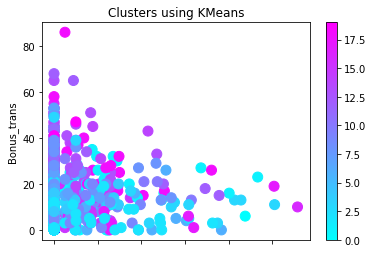

In [14]:
air.plot(x="Qual_miles",y ="Bonus_trans",c=clf.labels_,kind="scatter",s=100 ,cmap=plt.cm.cool) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

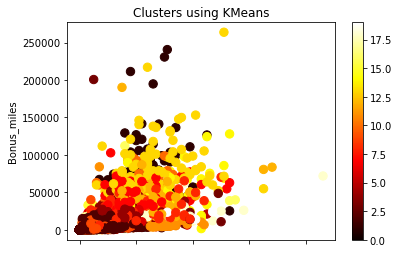

In [15]:
air.plot(x="Bonus_trans",y ="Bonus_miles",c=clf.labels_,kind="scatter",s=70 ,cmap=plt.cm.hot) 
plt.title('Clusters using KMeans')